# Sub-Task 1: Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
client_data = pd.read_csv("client_data.csv")
price_data = pd.read_csv("price_data.csv")

# Display basic information about the datasets
print("Client Data Info:")
print(client_data.info())



Client Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter

In [4]:
print("\nPrice Data Info:")
print(price_data.info())


Price Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB
None


In [5]:
# Summary statistics
print("\nClient Data Summary Statistics:")
print(client_data.describe())



Client Data Summary Statistics:
           cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66

In [7]:
print("\nPrice Data Summary Statistics:")
print(price_data.describe())


Price Data Summary Statistics:
       price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000 

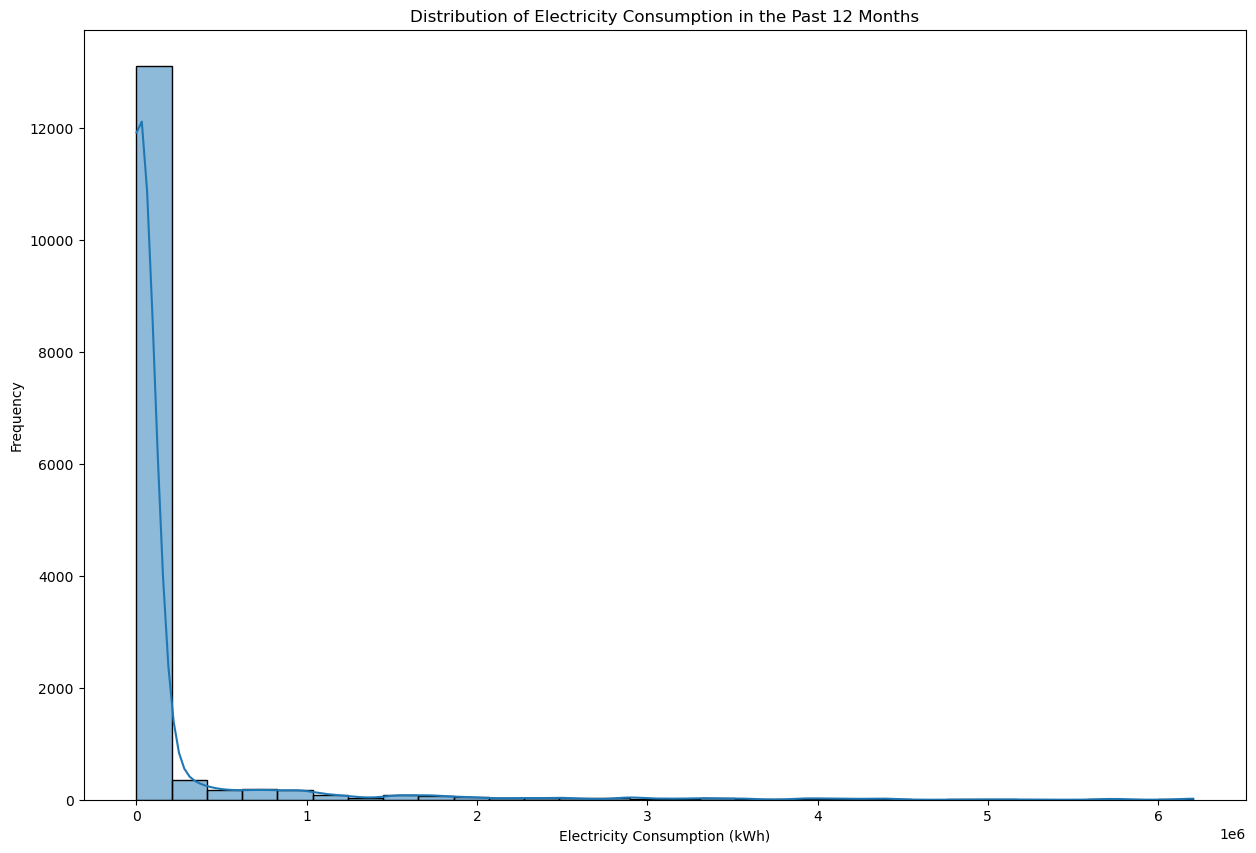

In [8]:
# Variable distributions
plt.figure(figsize=(15, 10))
sns.histplot(data=client_data, x='cons_12m', bins=30, kde=True)
plt.title("Distribution of Electricity Consumption in the Past 12 Months")
plt.xlabel("Electricity Consumption (kWh)")
plt.ylabel("Frequency")
plt.show()


# Sub-Task 2: Verify Price Sensitivity Hypothesis


One way to approach this would be to calculate the correlation between churn and some price-related features. Let's consider a simple example with one price feature.

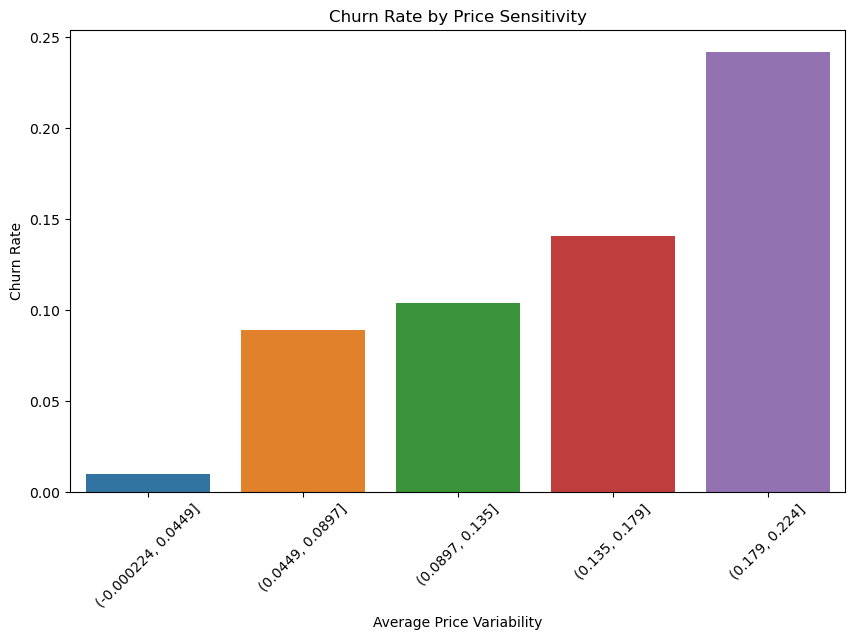

In [9]:
# Merge the datasets
merged_data = pd.merge(client_data, price_data, on='id')

# Calculate price sensitivity (using a simple example)
merged_data['avg_price_var'] = (merged_data['price_off_peak_var'] + merged_data['price_peak_var']) / 2

# Calculate churn rate for different price sensitivity levels
sensitivity_bins = pd.cut(merged_data['avg_price_var'], bins=5)
churn_rate_by_sensitivity = merged_data.groupby(sensitivity_bins)['churn'].mean()

# Plot churn rate by price sensitivity
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_sensitivity.index, y=churn_rate_by_sensitivity.values)
plt.title("Churn Rate by Price Sensitivity")
plt.xlabel("Average Price Variability")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


# Sub-Task 3: Summary and Data Augmentation Suggestions
It's a bit challenging to provide a complete half-page summary here, but I can guide you on what to include:



Key Findings: Summarize the main insights from your EDA and price sensitivity analysis. Highlight any significant correlations, trends, or patterns you've observed. For instance, discuss if there's a clear trend between price sensitivity and churn rate.

Data Augmentation Suggestions: Mention what additional data might be helpful to enhance the analysis. This could include customer demographic data, customer interaction data, economic indicators, etc. Explain how these additional data sources could potentially provide more context and improve the accuracy of the churn model.

Open Source Datasets: Suggest any publicly available datasets that could complement your analysis. For instance, demographic data from census sources, industry-specific data, or economic data from government sources. Explain how these datasets could provide external validation or additional features to enhance the churn prediction model.

Remember that the efficiency of your analysis depends on your familiarity with the tools and techniques used, as well as the depth of exploration you want to achieve. These examples provide a starting point, and you can expand on them based on your expertise and the insights you uncover